In [1]:
import json
import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from hdbscan import HDBSCAN
from umap import UMAP
import os
import torch
import re
from sklearn.feature_extraction.text import CountVectorizer

C:\Users\bin_l\anaconda3\envs\MIS\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# check device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"目前使用的設備是: {device}")

目前使用的設備是: cuda


In [3]:
#######################
# 用來把留言中的url清除
#######################

def clean_text(text):
    # 1. 移除網址 (http, https, ftp, www)
    text = re.sub(r'http\S+|www\.\S+', '', text)
    # 2. 移除一些社群常見的雜訊 (可選)
    # 例如：移除重複的換行或多餘空格
    text = text.replace('\n', ' ').strip()
    return text

In [4]:
##############
# Read data
##############

input_file_name = "ig_comments.json"
platform_name = "ig"

with open(input_file_name, "r", encoding="utf-8") as f:
    comments_dict = json.load(f)
print(f"成功從{input_file_name}讀取檔案至comments_dict\n")


成功從ig_comments.json讀取檔案至comments_dict



In [5]:
############
# Settings
############

# 1. 向量化模型 (使用多語言支援)
embedding_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

# 2. 降維模型 (UMAP): 影響分群的精細度
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

'''
# 3. 聚類模型 (HDBSCAN): 自動偵測分群
# min_cluster_size: 一個主題最少要有幾則留言 (可根據資料量調整)
hdbscan_model = HDBSCAN(min_cluster_size=len(comments_cleaned) * 0.05, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
'''

# 4. 關鍵字提取 (Vectorizer): 排除停用詞
vectorizer_model = CountVectorizer(stop_words=["的", "了", "在", "是", "我", "https", "com"])



print("設定元件完畢")

設定元件完畢


2025-12-23 14:34:33,034 - BERTopic - Embedding - Transforming documents to embeddings.


成功提取出修杰楷的留言至comment_cleaned


Batches: 100%|██████████| 28/28 [00:01<00:00, 16.27it/s]
2025-12-23 14:34:34,770 - BERTopic - Embedding - Completed ✓
2025-12-23 14:34:34,770 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-12-23 14:34:36,456 - BERTopic - Dimensionality - Completed ✓
2025-12-23 14:34:36,456 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-12-23 14:34:36,481 - BERTopic - Cluster - Completed ✓
2025-12-23 14:34:36,486 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-23 14:34:36,511 - BERTopic - Representation - Completed ✓


   Topic  Count                                          Name  \
0     -1    213             -1__linziting_偽造文書_lefthere036_沒事   
1      0    129                        0_歡迎來高雄_燥佬爺黃家肉燥飯_丹丹_高雄   
2      1     39                                1_修楷杰_楷杰_你好_hi   
3      2     38                              2_你逃兵_再說了_是不是_兄弟   
4      3     32                  3_1208_mo_____om_0127_chihyi   
5      4     27  4_itsicyicy_別忘記當初花錢處理兵役時_並非18歲以下的思想_明知不可為而為之   
6      5     27                            5_so_you_could_and   
7      6     25     6_三十秒後感覺哪裡不太對_不出來自首的是在幹嘛_不是修杰楷嗎_不是要說好話的意思   
8      7     18   7_gd不是也去當一年8個月_iron_bean_丟男人的臉_人家孫權武力指數2w以上   
9      8     17                   8_殺人案_a21935825_一一帶過_shnxun   

                                      Representation  \
0  [_linziting, 偽造文書, lefthere036, 沒事, ____ldk___...   
1  [歡迎來高雄, 燥佬爺黃家肉燥飯, 丹丹, 高雄, xian_a1021, 13, 9號餐真...   
2  [修楷杰, 楷杰, 你好, hi, 你好楷杰哈哈哈哈, 修杰楷來仁武耶, 修楷杰xddddd...   
3  [你逃兵, 再說了, 是不是, 兄弟, ain, in, jail, military, s...   
4  [

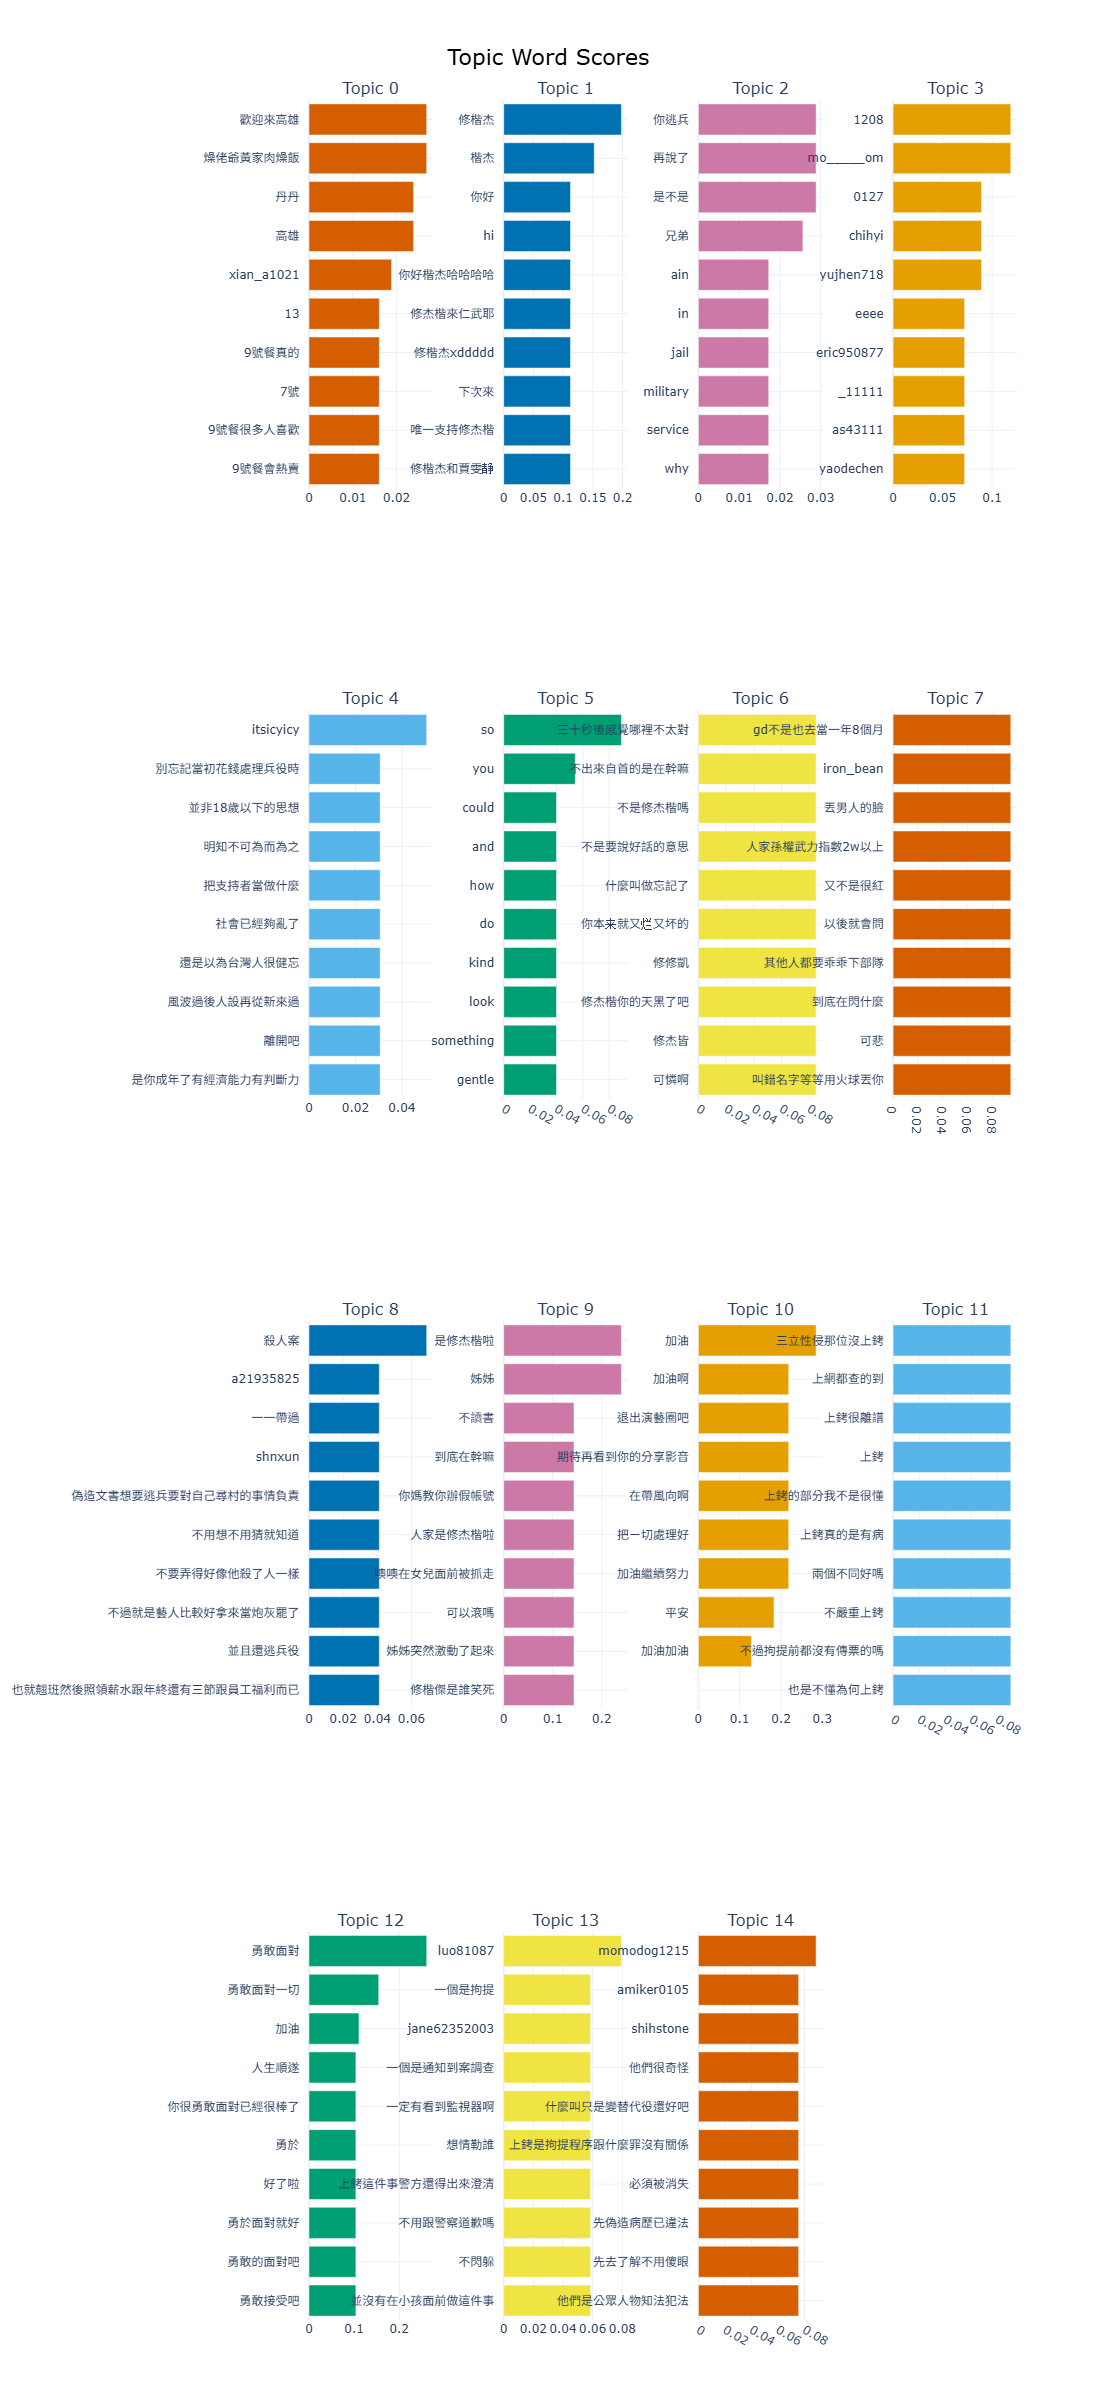

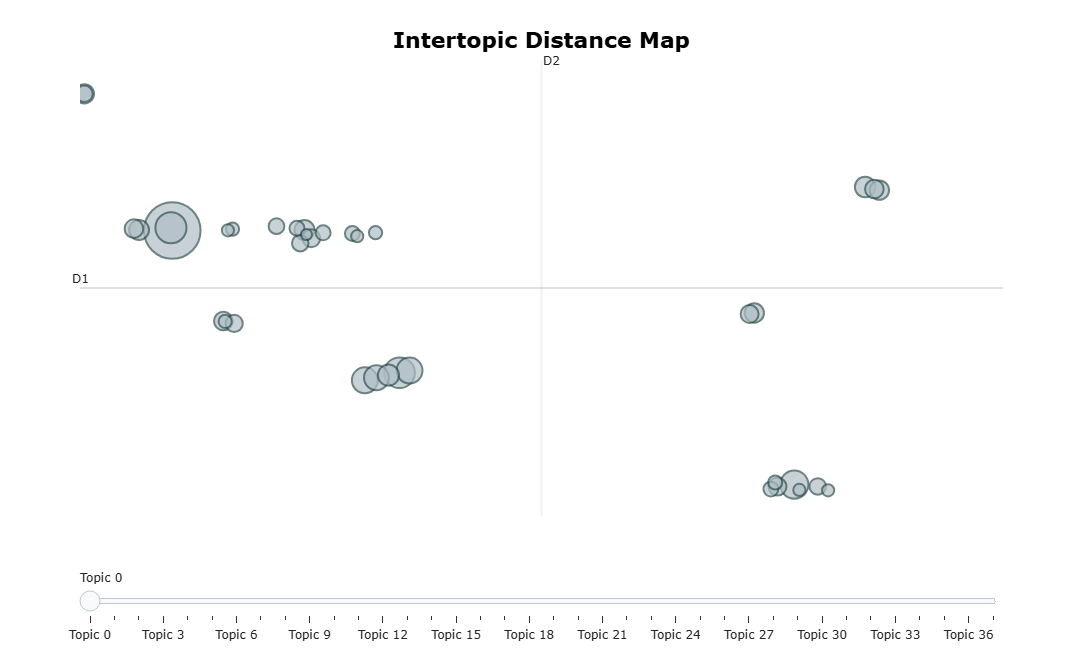

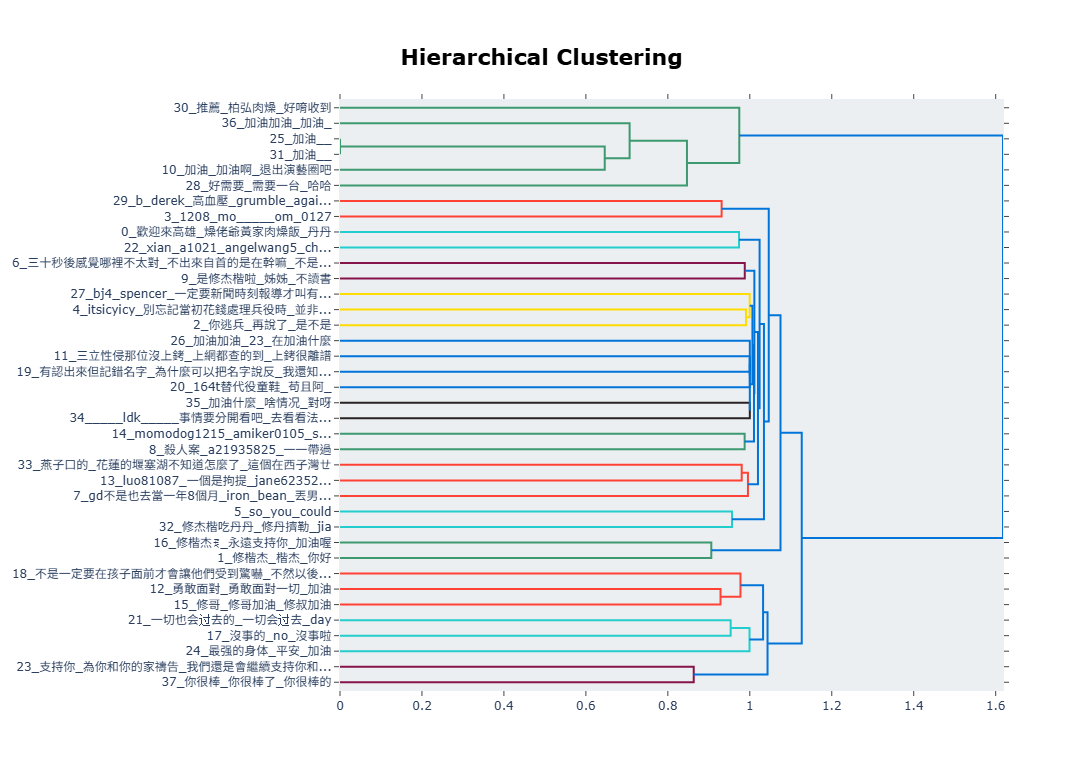

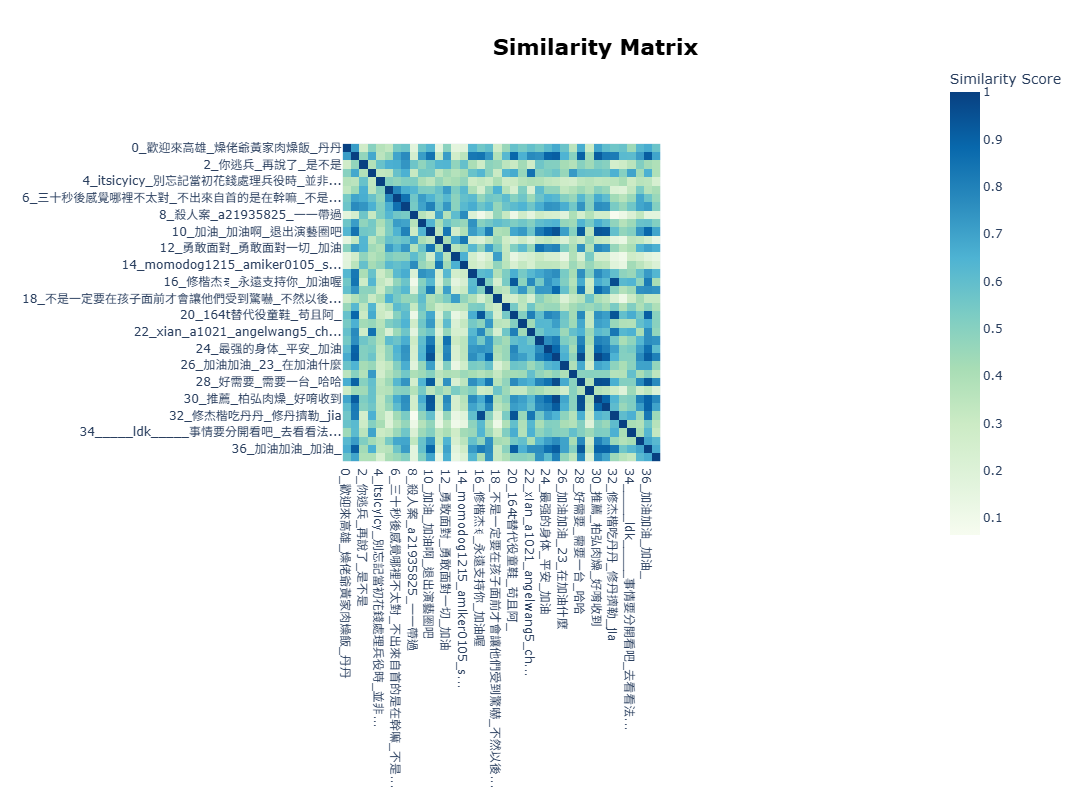

2025-12-23 14:34:36,997 - BERTopic - Embedding - Transforming documents to embeddings.


成功提取出廖允杰的留言至comment_cleaned


Batches: 100%|██████████| 13/13 [00:01<00:00, 11.37it/s]
2025-12-23 14:34:38,149 - BERTopic - Embedding - Completed ✓
2025-12-23 14:34:38,150 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-12-23 14:34:38,808 - BERTopic - Dimensionality - Completed ✓
2025-12-23 14:34:38,810 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-12-23 14:34:38,820 - BERTopic - Cluster - Completed ✓
2025-12-23 14:34:38,822 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-23 14:34:38,832 - BERTopic - Representation - Completed ✓


   Topic  Count                                     Name  \
0     -1     94                      -1_小杰加油_沒差_好好吃飯_哪裡怕   
1      0     60                      0_恭喜_恭喜恭喜_恭喜得獎_恭喜小杰   
2      1     34         1_好帥好帥_好帥_但應該可以漏一下身材啦_一身棕色非常帅气亮眼   
3      2     25                  2_等你回來_等你回来_好好處理_我們等你回來   
4      3     21                        3_加油_がんばって_终于_加油啊   
5      4     16          4_被抓才在道歉_095_yaaaaaaaaaaa98_xin   
6      5     14  5_一切都會重新回到軌道的_不完美_人都会有走错路的时候_人都會有做錯事的時候   
7      6     14          6_好好當兵_好好把兵當完沒有什麼好嗎_原味臭小鳥_反正又不紅   
8      7     13              7_不想好好工作_好看的太無法無天了吧_再嘴啊_不可能   
9      8     13                         8_我們都在_沒事_we_are   

                                      Representation  \
0  [小杰加油, 沒差, 好好吃飯, 哪裡怕, scdesign2018, you, vicko...   
1  [恭喜, 恭喜恭喜, 恭喜得獎, 恭喜小杰, 太帥了, 恭喜哥哥, 你們真的很棒, 你們會成...   
2  [好帥好帥, 好帥, 但應該可以漏一下身材啦, 一身棕色非常帅气亮眼, 來吧, 又不是多紅的...   
3  [等你回來, 等你回来, 好好處理, 我們等你回來, 加油, jaydaone111, 六棒...   
4      [加油, がんばって, 终于, 加油啊, 一起變得更好, 一起努力, 加油歐, , , ]   
5  

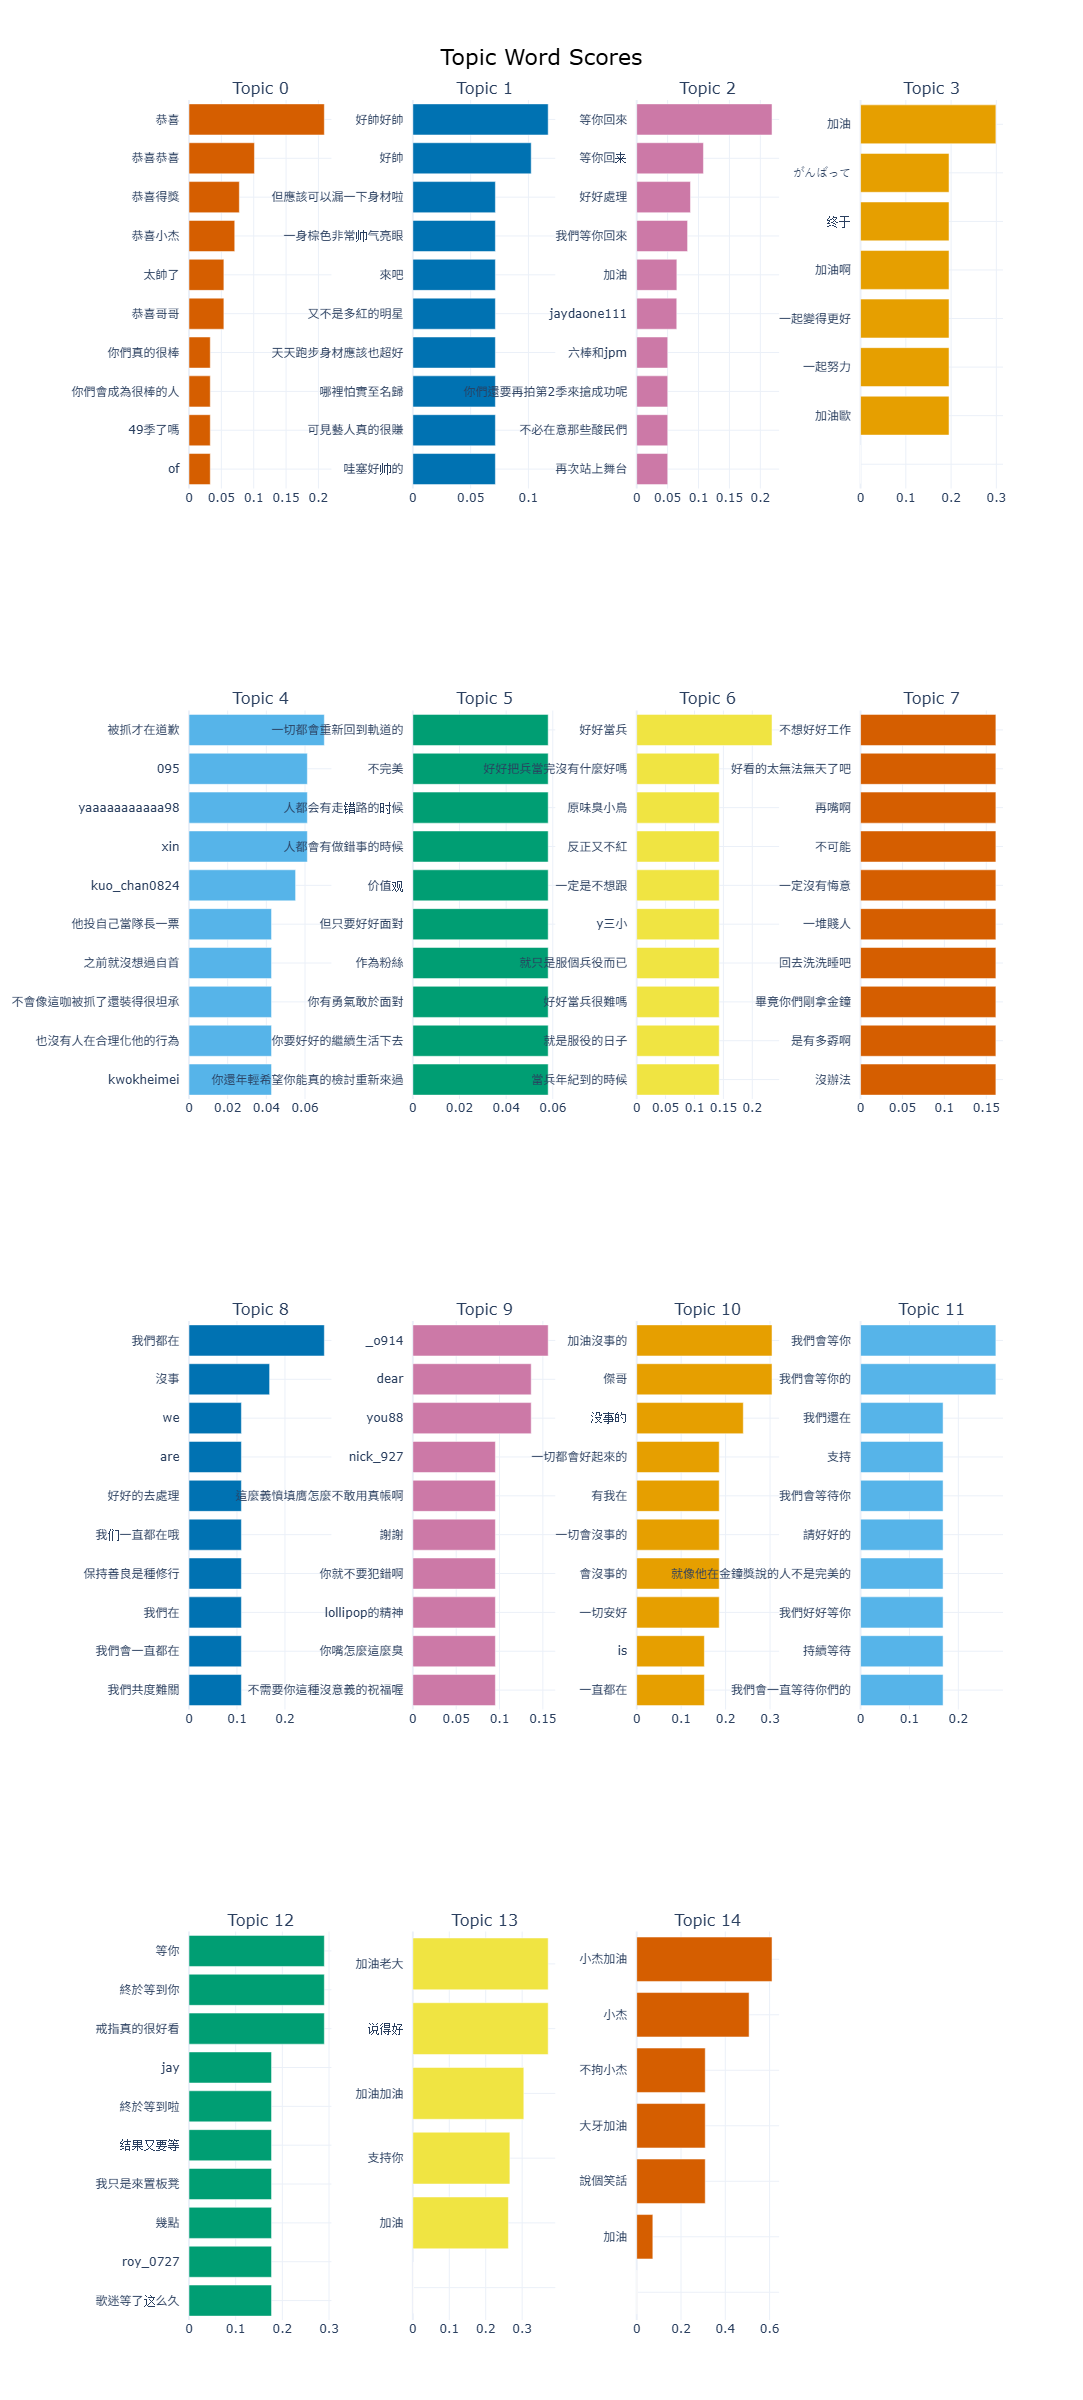

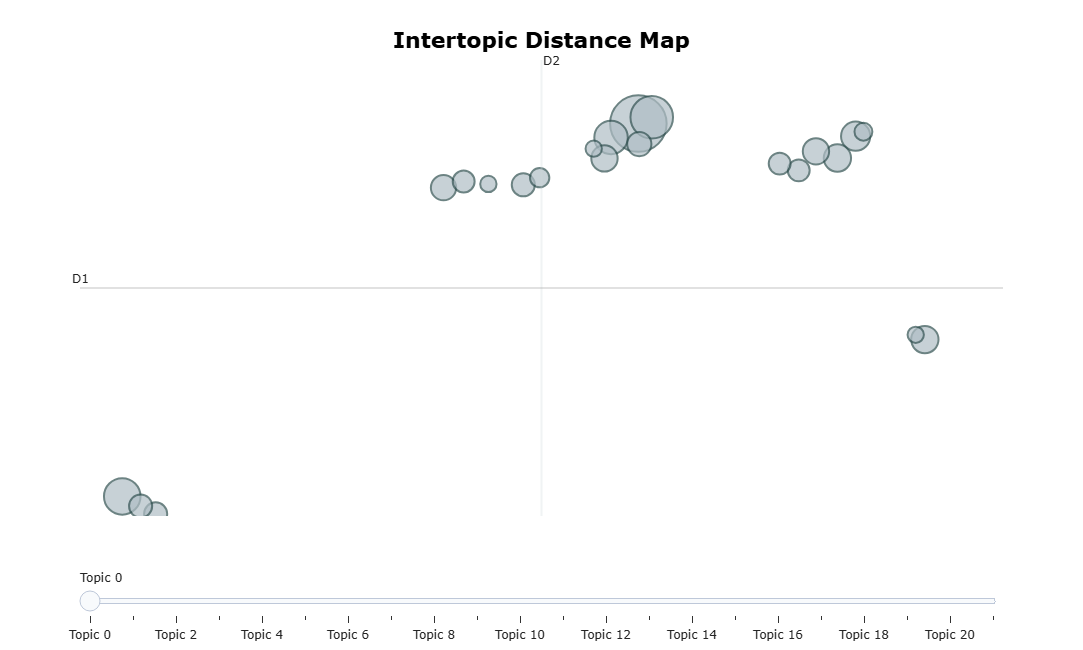

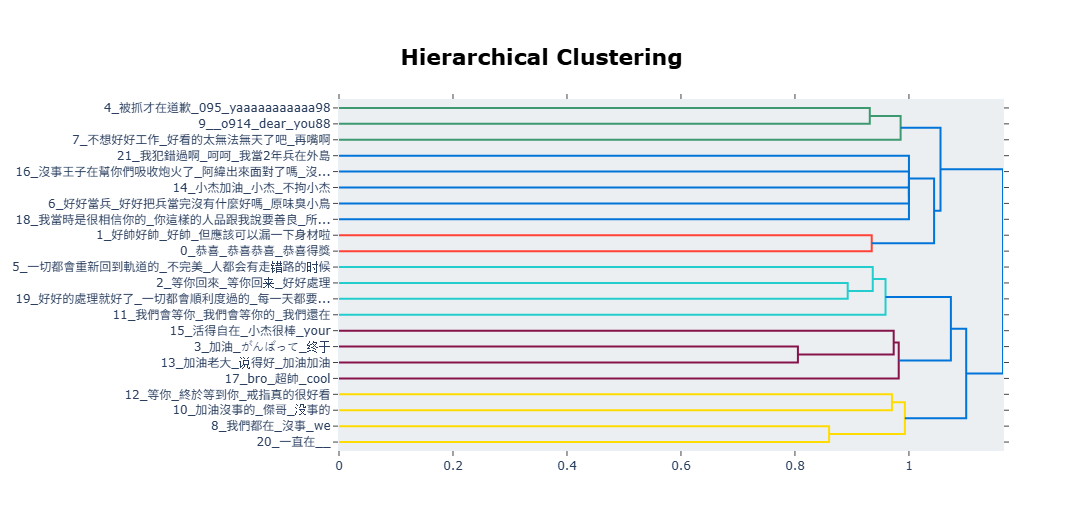

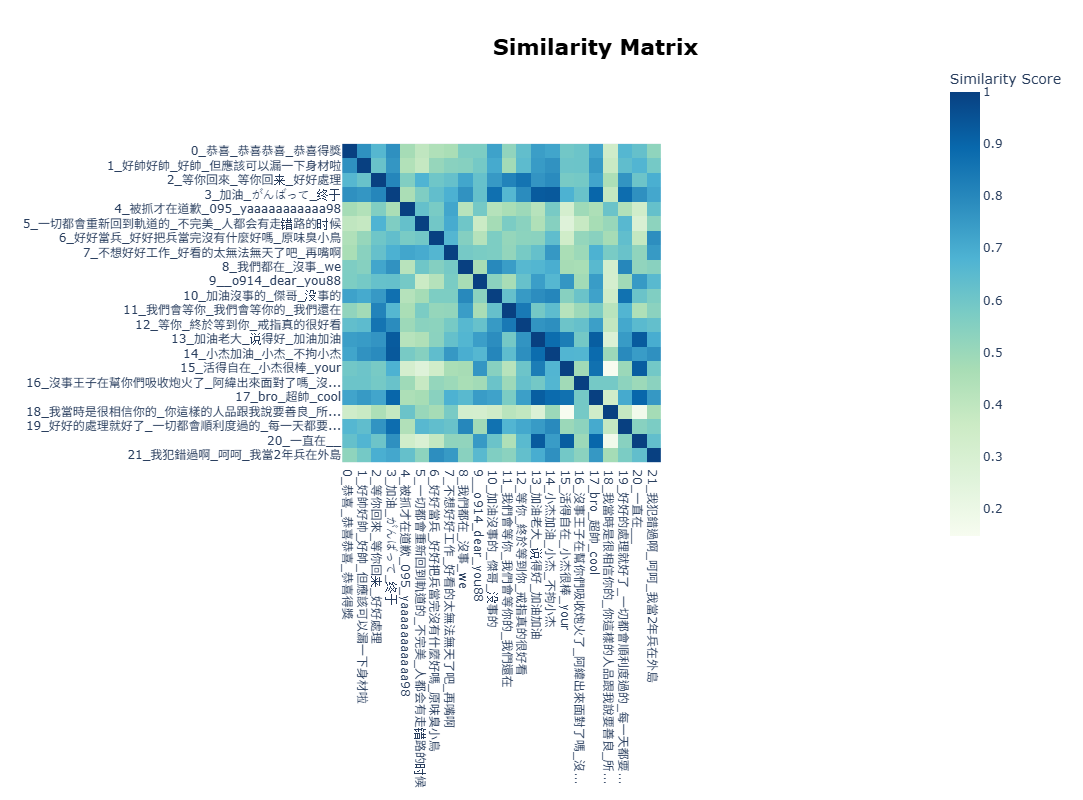

2025-12-23 14:34:39,255 - BERTopic - Embedding - Transforming documents to embeddings.


成功提取出張書偉的留言至comment_cleaned


Batches: 100%|██████████| 15/15 [00:00<00:00, 18.70it/s]
2025-12-23 14:34:40,067 - BERTopic - Embedding - Completed ✓
2025-12-23 14:34:40,068 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-12-23 14:34:40,749 - BERTopic - Dimensionality - Completed ✓
2025-12-23 14:34:40,750 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-12-23 14:34:40,760 - BERTopic - Cluster - Completed ✓
2025-12-23 14:34:40,761 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-23 14:34:40,774 - BERTopic - Representation - Completed ✓


   Topic  Count                                               Name  \
0     -1    118                        -1_沒事的_加油_lovebaby1106_我們都在   
1      0     52       0_gagahsu1024_minmin3397_kalbkbwx_nickyhsu21   
2      1     46                               1_書偉哥_好久不見_好想你_一起做愛心   
3      2     36                                  2_水哥_是水哥_書偉_加油书伟哥   
4      3     28                          3_我們一直都在_我們都在_我們一直在_我們都會在   
5      4     22  4_他在慈濟大愛電視演八點檔的好人人設也都沒了_中彩票頭獎的機率還要小_這比被雷打到_所以我...   
6      5     18                   5_luyong0303_wyhny_75248_william   
7      6     16                                 6_永遠支持_永遠支持你_加油_we   
8      7     16                             7_y_angie_xd_12_認同_24見   
9      8     15                          8_等你們回來_終於等到你發文了_水哥加油_好想你   

                                      Representation  \
0  [沒事的, 加油, lovebaby1106, 我們都在, 好好面對, 書偉加油, kkk0...   
1  [gagahsu1024, minmin3397, kalbkbwx, nickyhsu21...   
2  [書偉哥, 好久不見, 好想你, 一起做愛心, 希望你一切都好, 24見, 終於發文了, 書...   
3  [水

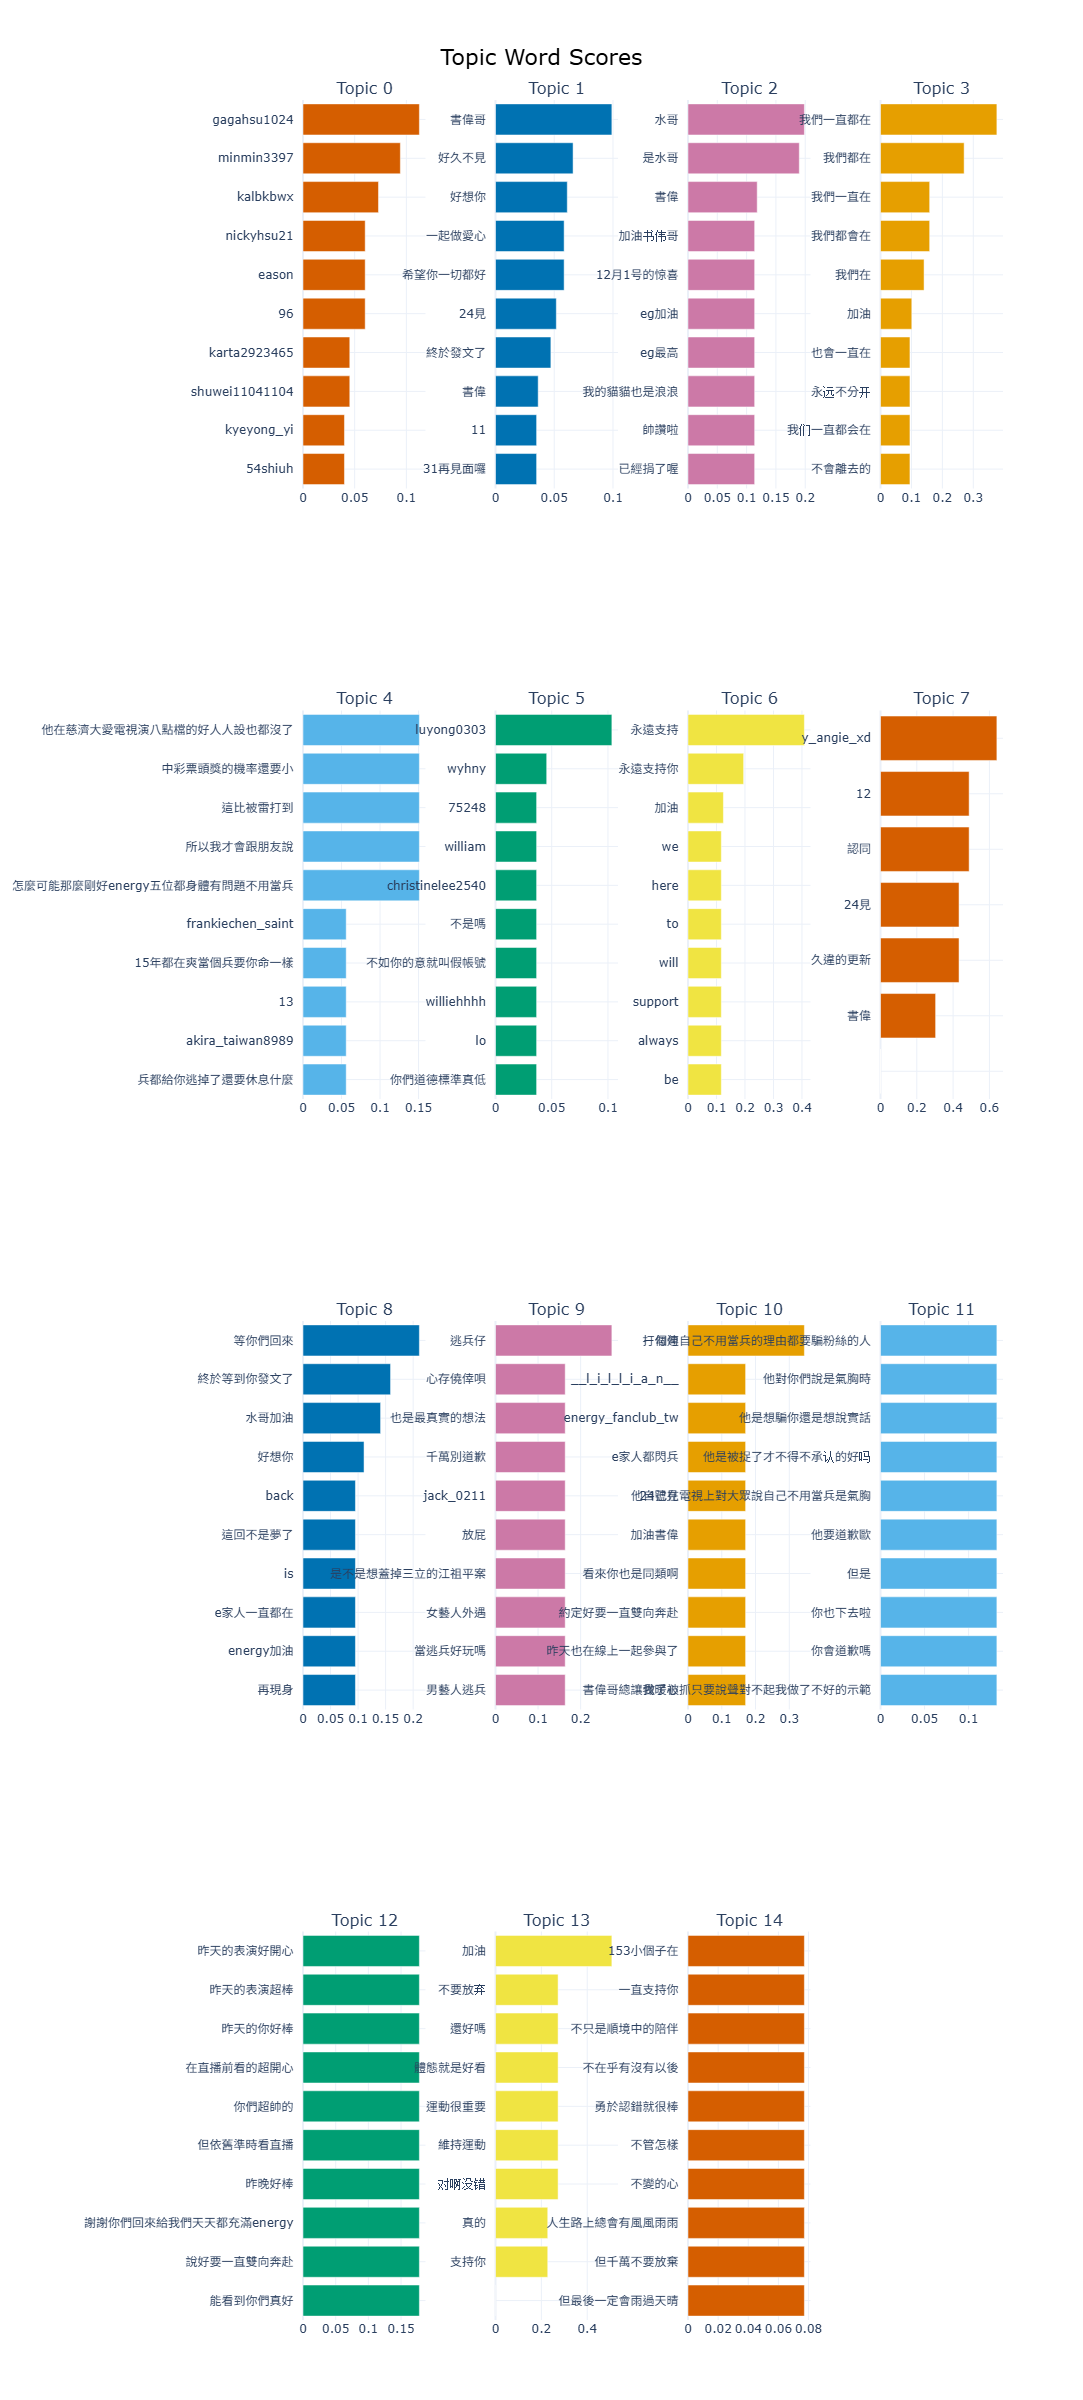

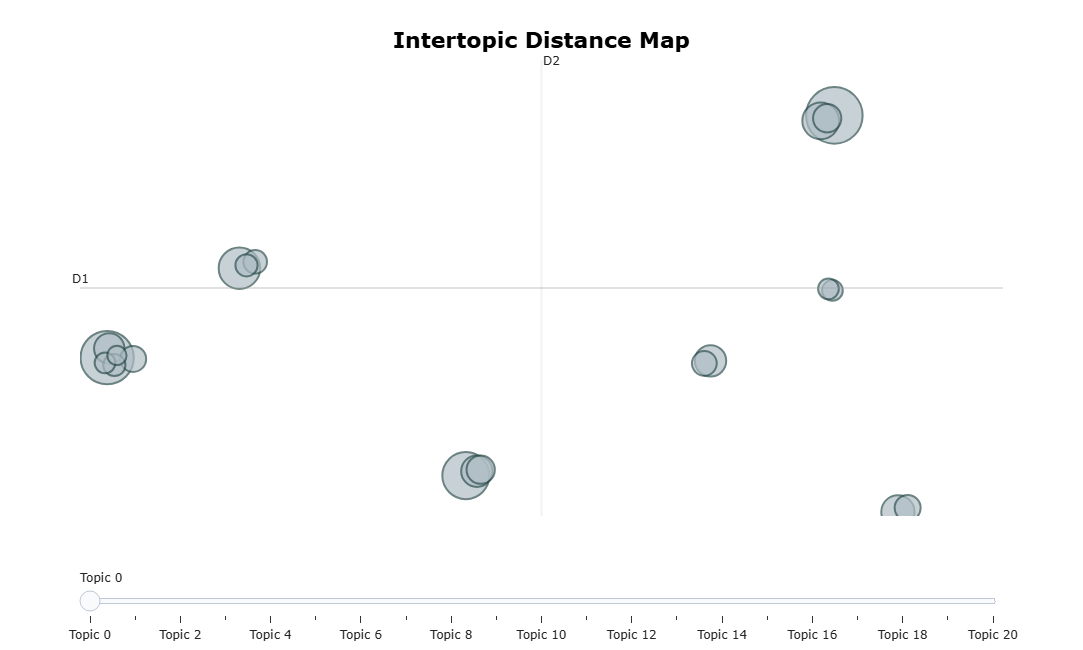

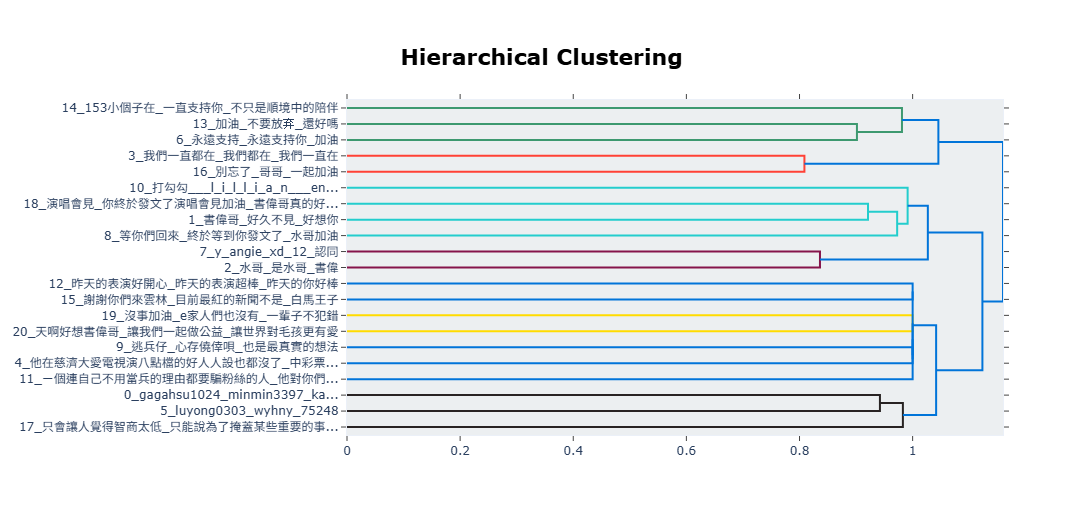

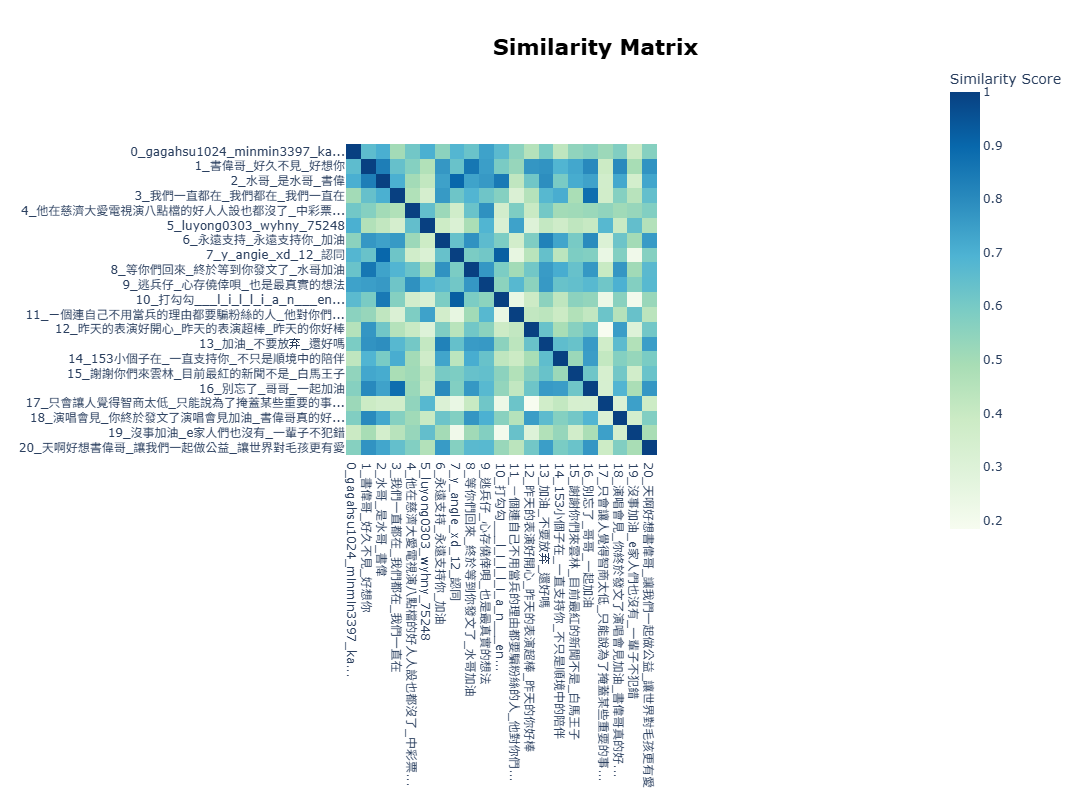

2025-12-23 14:34:41,282 - BERTopic - Embedding - Transforming documents to embeddings.


成功提取出王大陸資訊分享台灣站的留言至comment_cleaned


Batches: 100%|██████████| 1/1 [00:00<00:00, 16.40it/s]
2025-12-23 14:34:41,351 - BERTopic - Embedding - Completed ✓
2025-12-23 14:34:41,352 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-12-23 14:34:41,373 - BERTopic - Dimensionality - Completed ✓
2025-12-23 14:34:41,374 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-12-23 14:34:41,376 - BERTopic - Cluster - Completed ✓
2025-12-23 14:34:41,378 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-23 14:34:41,383 - BERTopic - Representation - Completed ✓
2025-12-23 14:34:41,391 - BERTopic - Embedding - Transforming documents to embeddings.


   Topic  Count                                    Name  \
0     -1     11  -1_王大陸_esquirefine_instagram_j小編照片資訊更新   

                                      Representation  \
0  [王大陸, esquirefine, instagram, j小編照片資訊更新, magaz...   

                                 Representative_Docs  
0  [聽說你跟李沁拍戲像拔罐喔，多會親，玲北讓你變南極大陸啦, 🌊你的决断力和勇气，就像大海一样...  
儲存王大陸資訊分享台灣站的結果到 hdbscan_topics_ig_王大陸資訊分享台灣站.csv
成功提取出謝坤達的留言至comment_cleaned


Batches: 100%|██████████| 37/37 [00:01<00:00, 21.58it/s]
2025-12-23 14:34:43,122 - BERTopic - Embedding - Completed ✓
2025-12-23 14:34:43,122 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-12-23 14:34:45,674 - BERTopic - Dimensionality - Completed ✓
2025-12-23 14:34:45,675 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-12-23 14:34:45,710 - BERTopic - Cluster - Completed ✓
2025-12-23 14:34:45,712 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-23 14:34:45,740 - BERTopic - Representation - Completed ✓


   Topic  Count                            Name  \
0     -1    255  -1_go_hsieh_kunda_哈哈哈哈_哈哈哈哈哈哈哈   
1      0     89               0_好帥_達哥好帥_達達好帥_好帅   
2      1     54         1_等你回來_我們等你回來_我們等你_等你回歸   
3      2     45         2_太好笑了_好好笑_太好笑了啦_哈哈哈哈哈哈   
4      3     44   3_當兵了嗎_當兵有什麼難的_看不懂_不然就是腦子有問題的   
5      4     40     4_算什麼男人_每個人都會犯錯_公眾人物知法犯法_笑死   
6      5     27                    5_來個呂布的台詞___   
7      6     26          6_加油加油_加油_我還是會繼續看_翻車現場   
8      7     24      7_不是快跑衝刺_大家都沒有放棄_孰能無過_誰人無過   
9      8     21            8_達達加油_男分男捨_桑勳惹_男以理解   

                                      Representation  \
0  [go, hsieh_kunda, 哈哈哈哈, 哈哈哈哈哈哈哈, 閃兵天團, 達達加油, 達...   
1  [好帥, 達哥好帥, 達達好帥, 好帅, 達哥很有, 好帥喔toro, 哈哈, 你也是我心中...   
2  [等你回來, 我們等你回來, 我們等你, 等你回歸, 坤達等你回歸, 等你, 達哥, 達哥加...   
3  [太好笑了, 好好笑, 太好笑了啦, 哈哈哈哈哈哈, 快笑瘋好好看, 哈哈哈, lucu, ...   
4  [當兵了嗎, 當兵有什麼難的, 看不懂, 不然就是腦子有問題的, 上手銬了齁, 下面還在護航...   
5  [算什麼男人, 每個人都會犯錯, 公眾人物知法犯法, 笑死, 一堆護航的白癡, 不只是一般民...   
6                        [來個呂布的台詞, , , , , , ,

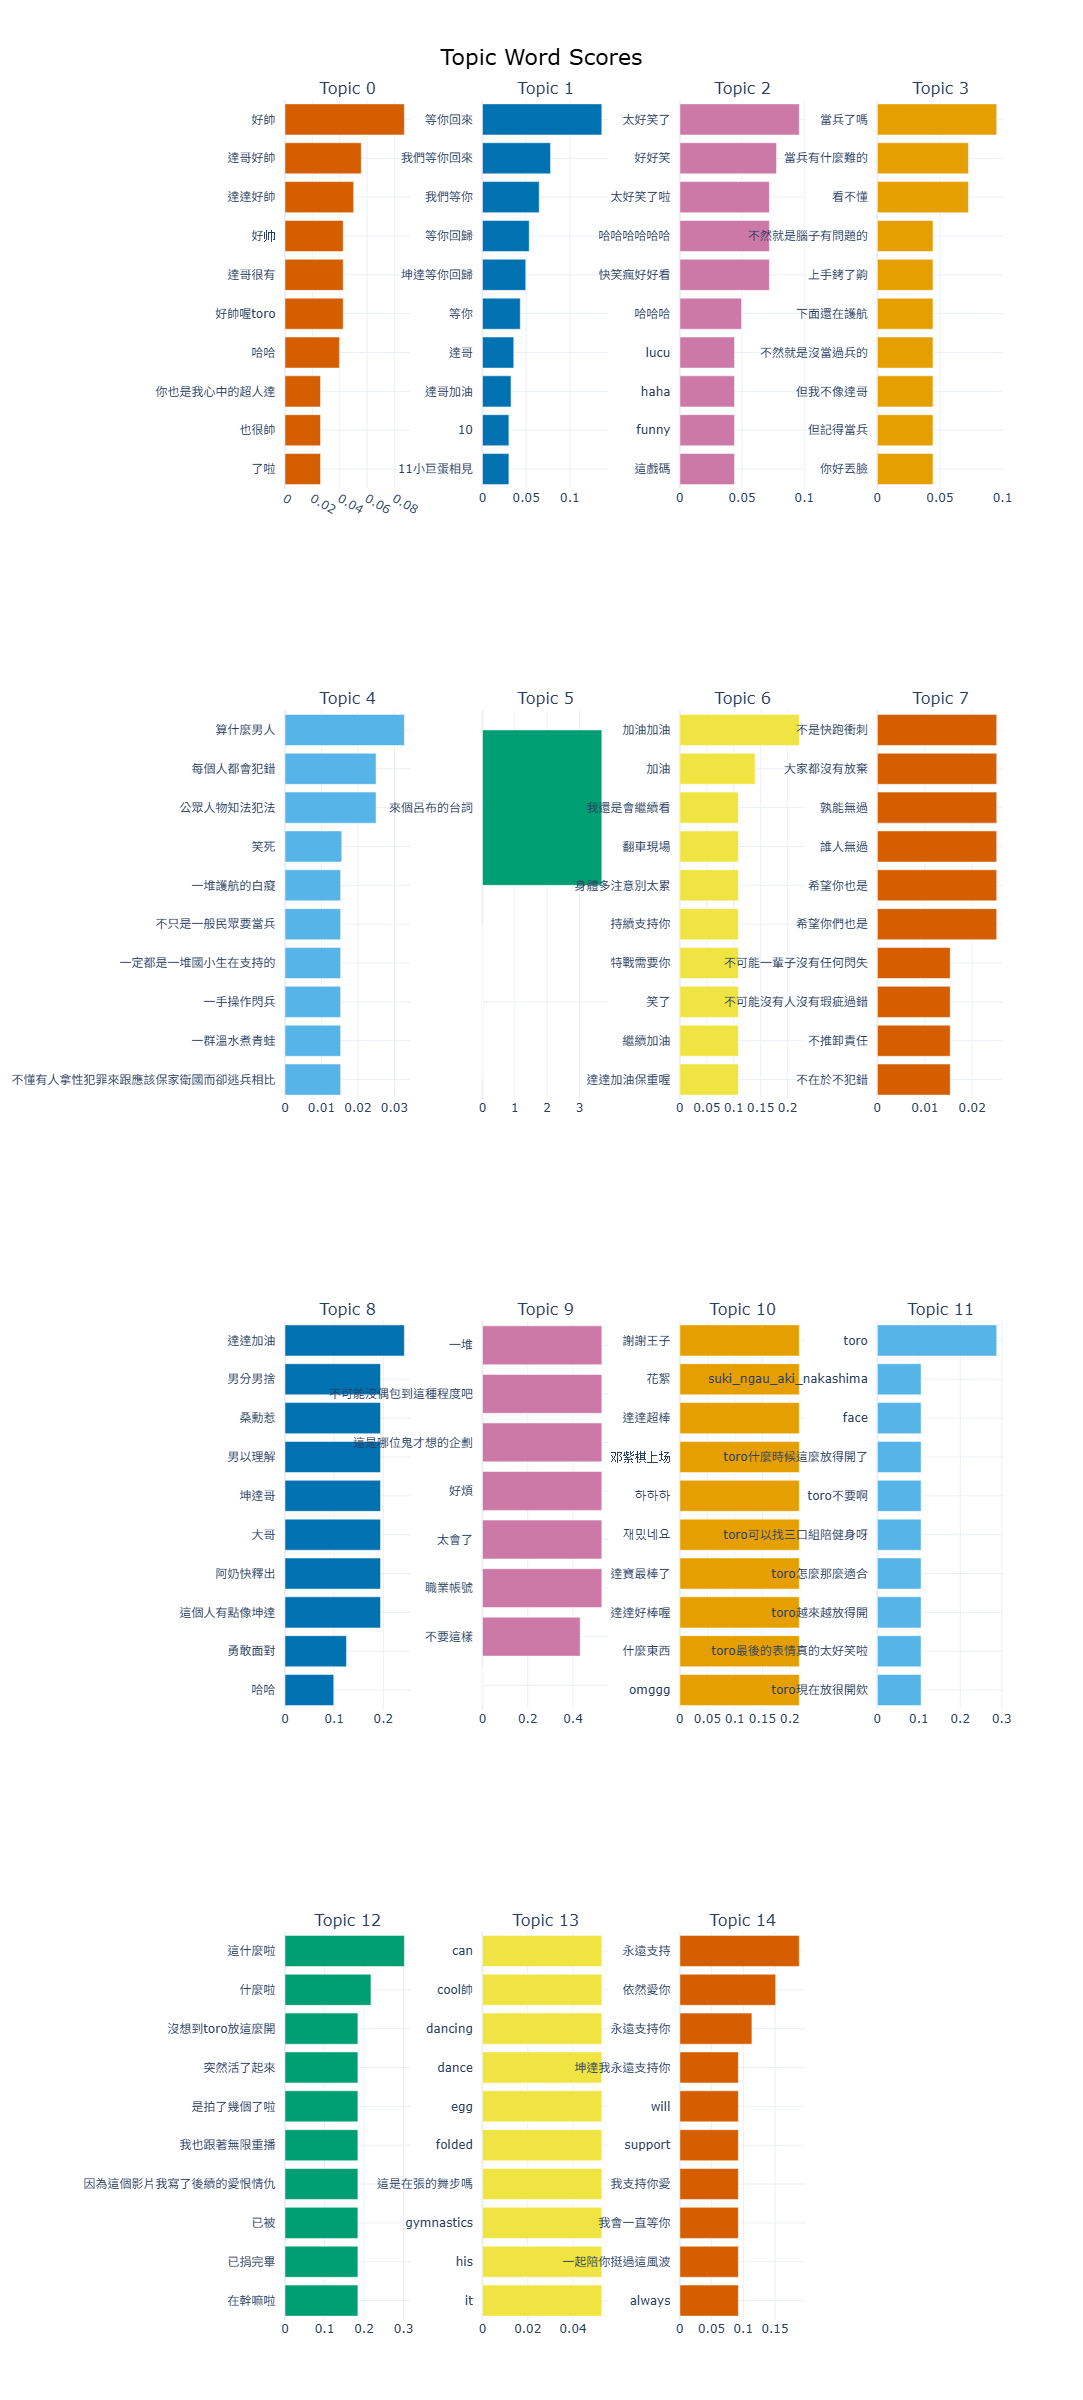

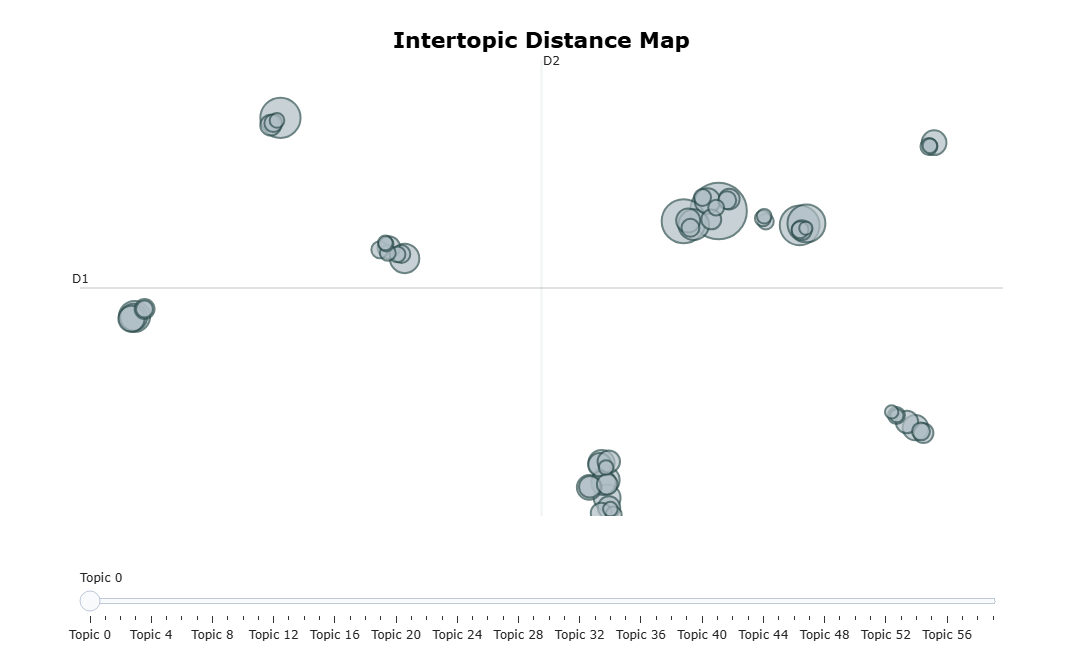

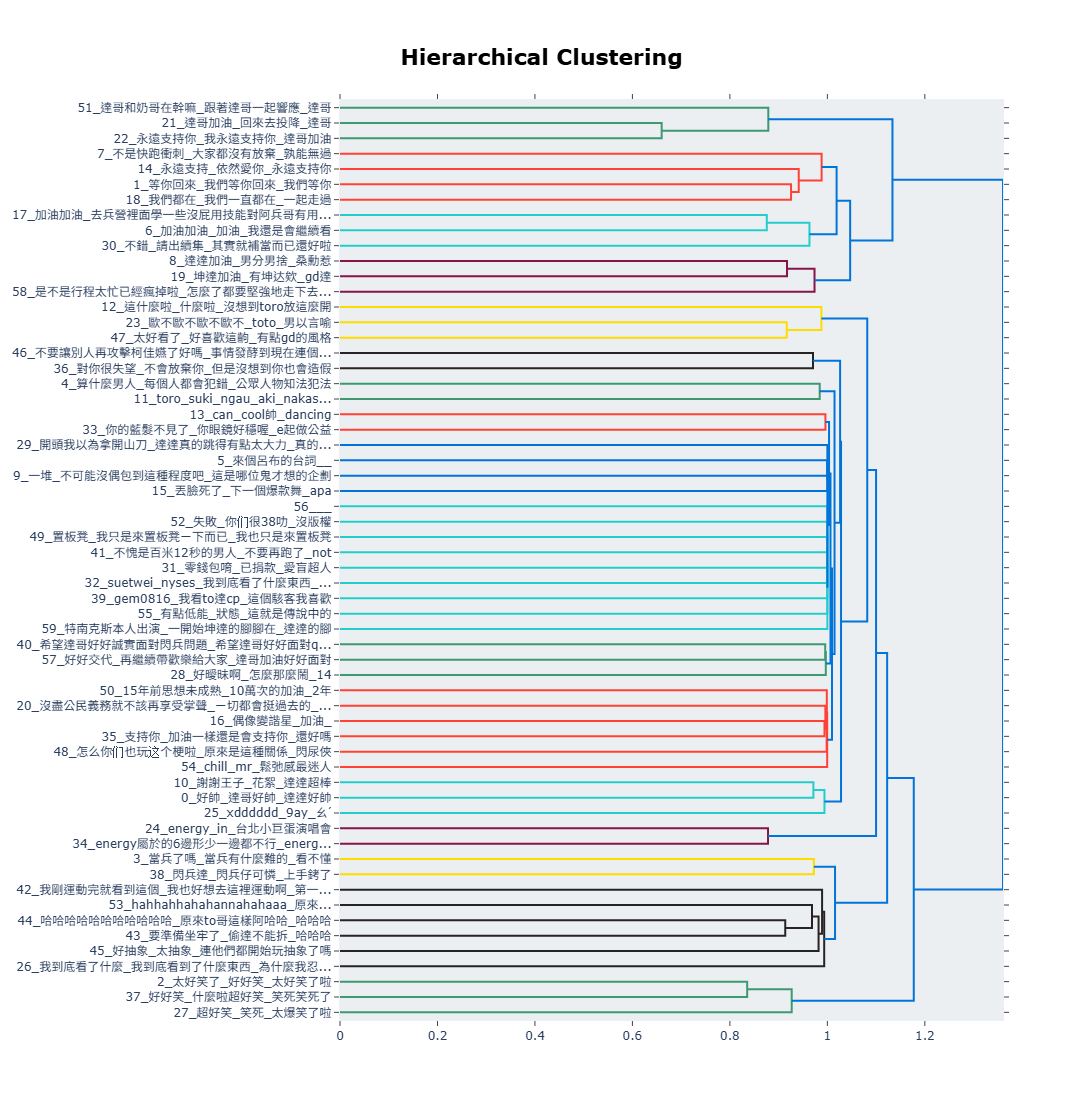

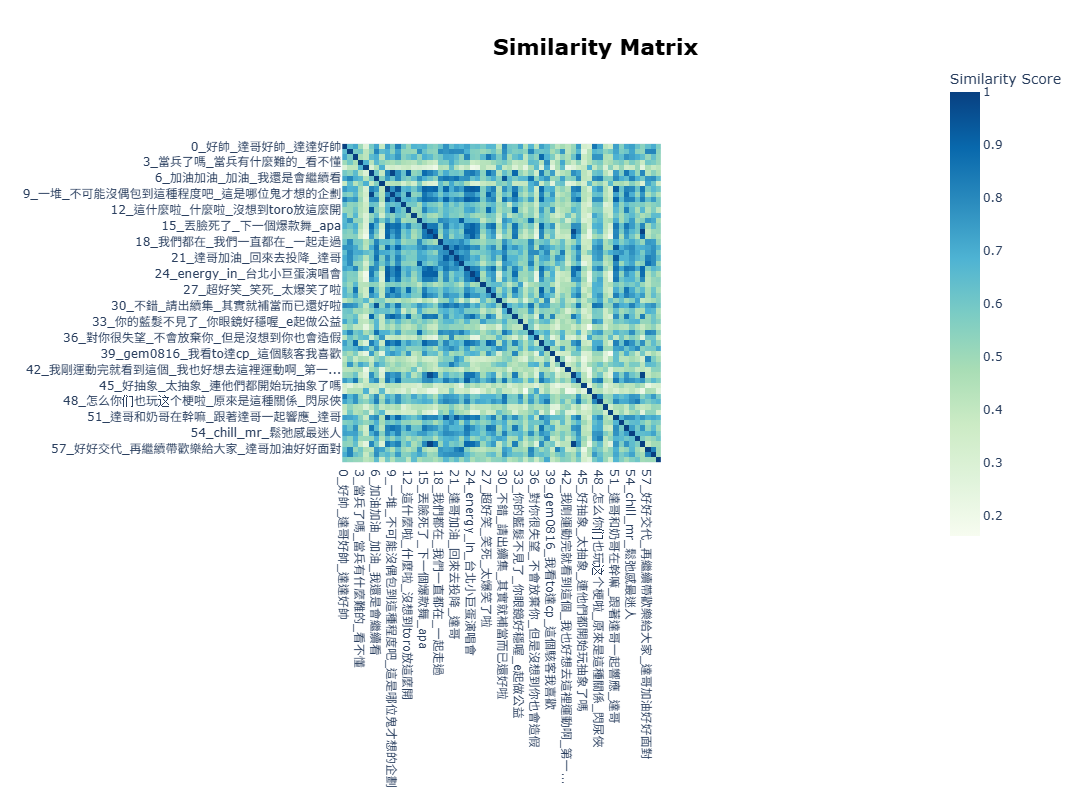

2025-12-23 14:34:46,265 - BERTopic - Embedding - Transforming documents to embeddings.


成功提取出阿達的留言至comment_cleaned


Batches: 100%|██████████| 7/7 [00:00<00:00, 15.04it/s]
2025-12-23 14:34:46,739 - BERTopic - Embedding - Completed ✓
2025-12-23 14:34:46,739 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-12-23 14:34:47,013 - BERTopic - Dimensionality - Completed ✓
2025-12-23 14:34:47,013 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-12-23 14:34:47,020 - BERTopic - Cluster - Completed ✓
2025-12-23 14:34:47,023 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-23 14:34:47,033 - BERTopic - Representation - Completed ✓


   Topic  Count                                           Name  \
0     -1     55          -1_置板凳_帶你北檢自首到處飛_rubysu_23_zk_charlie   
1      0     37                        0_atotheda_came_lol_out   
2      1     31                   1_炸雞獵人_100_buttermilk_三杯田雞超猛   
3      2     18                          2_在哪裡_地址呢_哥拜託給一下地址_不是   
4      3     16                     3_0702_15___tony_23323_106   
5      4     16  4_一堆吵逃兵的是家裡死人是不是_他沒當兵_吃這麼胖不當兵_只是我以為你們肥男幫都不用當兵   
6      5     11                 5_66小吃店_gdb1016_找到惹是新北市瑞芳區的_地址   
7      6     10            6_不管事情如何發展永遠支持你_達哥加油_這家真的非常之強_在地人在此   

                                      Representation  \
0  [置板凳, 帶你北檢自首到處飛, rubysu_23, zk_charlie, 不不不, 人...   
1  [atotheda, came, lol, out, that, when, you, 不給...   
2  [炸雞獵人, 100, buttermilk, 三杯田雞超猛, 三芝興隆, 不能說的白斬雞,...   
3  [在哪裡, 地址呢, 哥拜託給一下地址, 不是, 分享沒地址, 哪家啊, 怎麼還一堆人幫高調...   
4  [0702, 15, __tony, 23323_106, bao52001, chi2k9...   
5  [一堆吵逃兵的是家裡死人是不是, 他沒當兵, 吃這麼胖不當兵, 只是我以為你們肥男幫都不用當...   
6  [66小吃店, gd

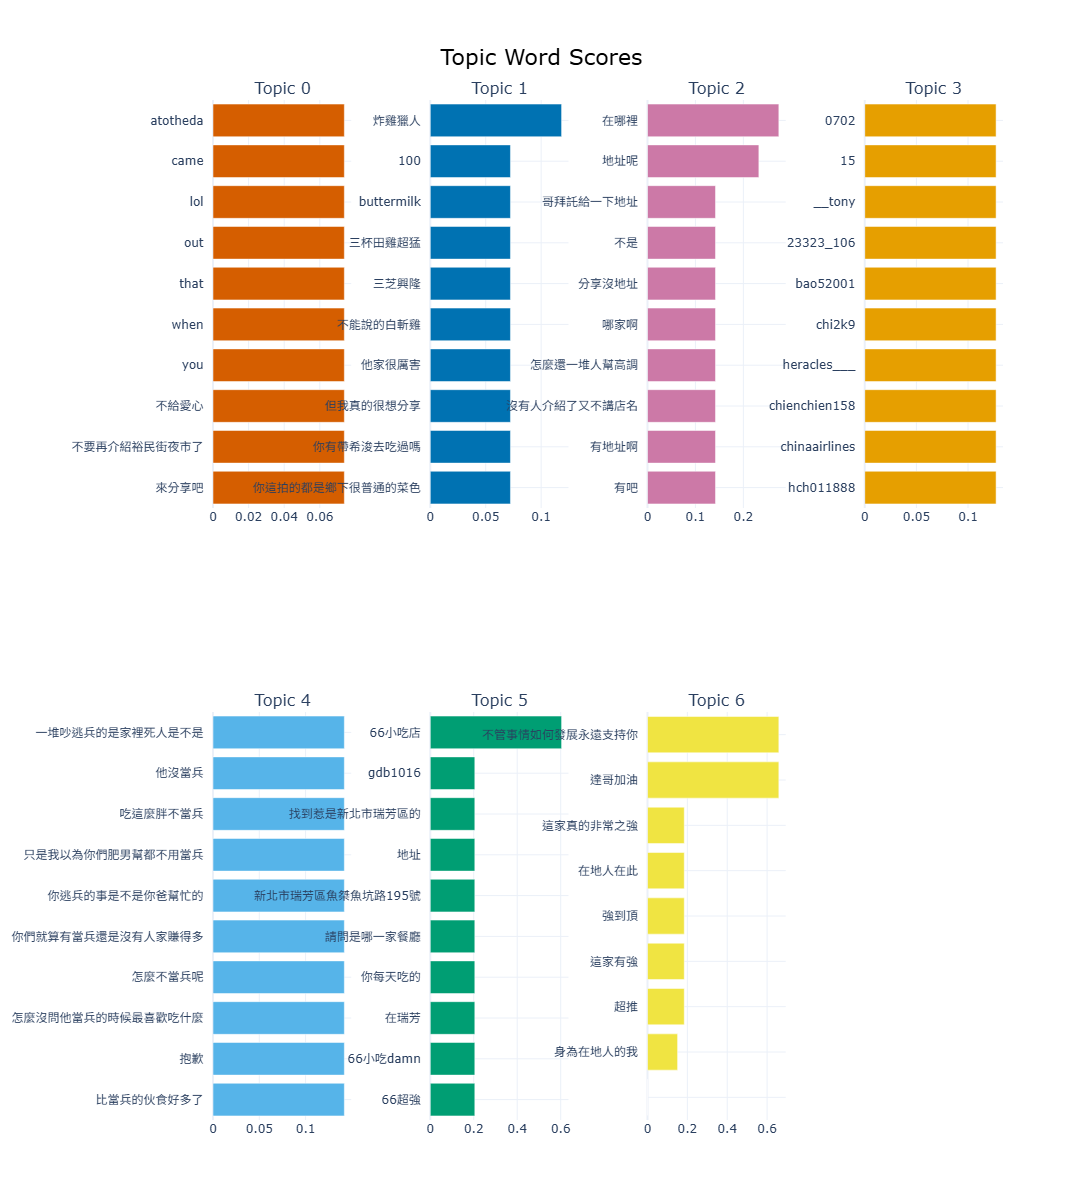

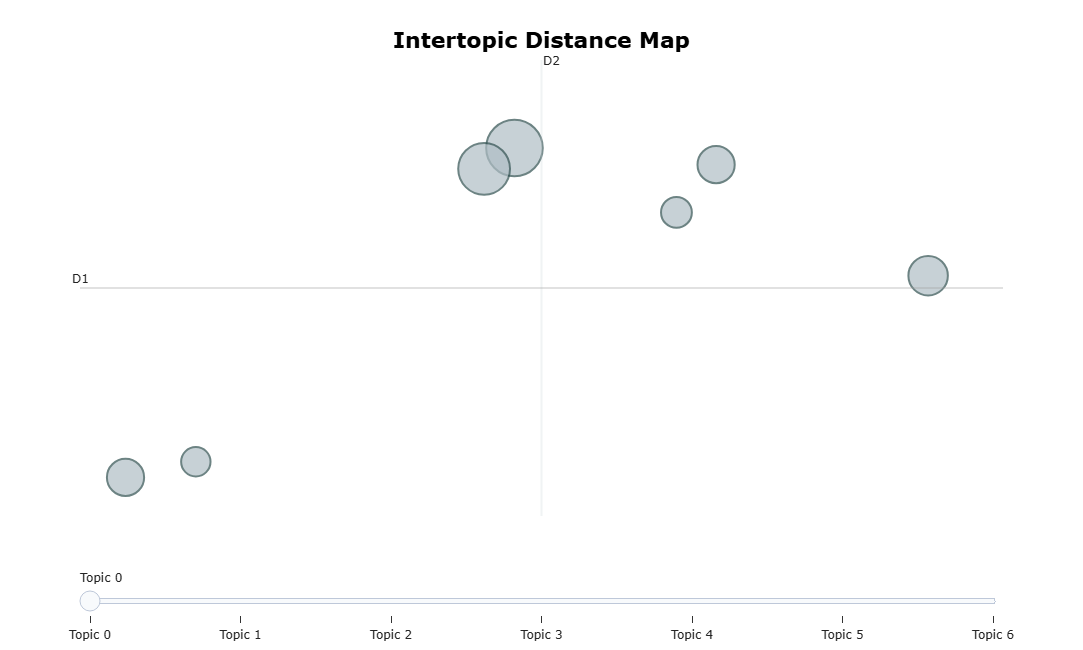

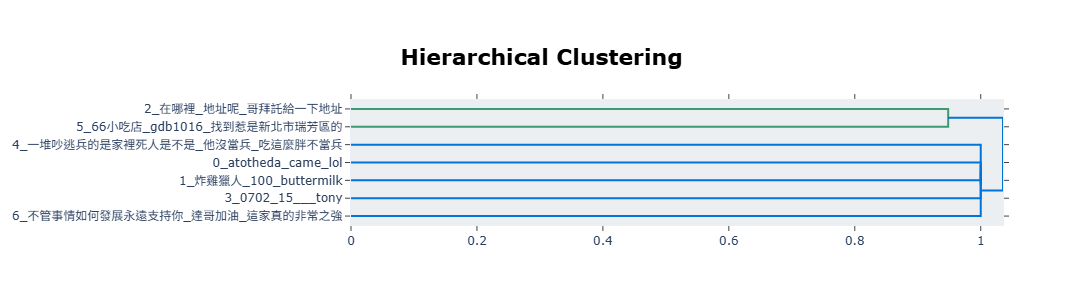

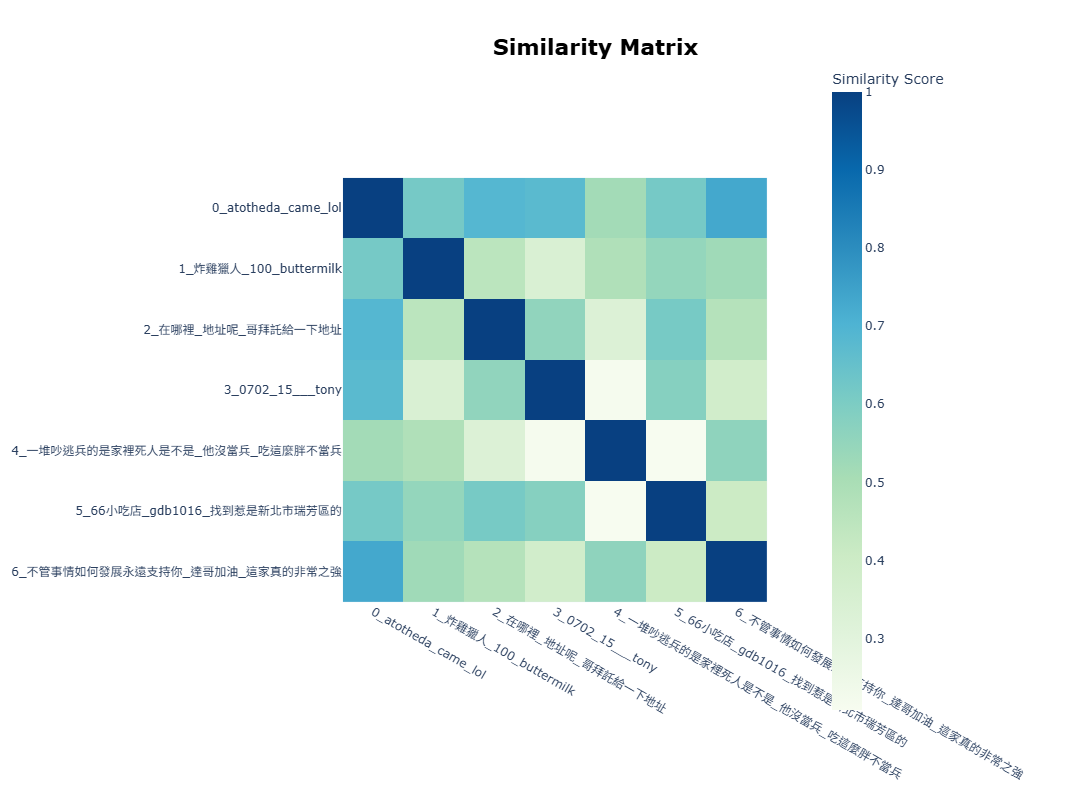

2025-12-23 14:34:47,581 - BERTopic - Embedding - Transforming documents to embeddings.


成功提取出陳零九的留言至comment_cleaned


Batches: 100%|██████████| 48/48 [00:02<00:00, 23.50it/s]
2025-12-23 14:34:49,631 - BERTopic - Embedding - Completed ✓
2025-12-23 14:34:49,631 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-12-23 14:34:53,161 - BERTopic - Dimensionality - Completed ✓
2025-12-23 14:34:53,165 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-12-23 14:34:53,196 - BERTopic - Cluster - Completed ✓
2025-12-23 14:34:53,199 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-23 14:34:53,237 - BERTopic - Representation - Completed ✓


   Topic  Count                              Name  \
0     -1    189     -1_好好生活_哥加油_09要回來了嗎_instagram   
1      0     67   0_陳零九_hznlllp_冷暖點滴自知_不懂的人就繼續跳腳吧   
2      1     40  1_媒體真的很爛_chaidy_alonecat0409_ㄐㄧㄥ   
3      2     38                         2_米修米修___   
4      3     35        3_等你回歸_我們等你回來_等你回來_終於等到你回來   
5      4     29       4_零九加油_零九_零九加油不要再自責了_開心看到零九   
6      5     29              5_終於等到你了_終於等到你_等你_消息   
7      6     28             6_09好好休息_愛結尾_退伍嘍_繼續加油   
8      7     27              7_歡迎回來_好想你啊_回來了_1576   
9      8     27              8_支持_一直都在_support_抱抱   

                                      Representation  \
0  [好好生活, 哥加油, 09要回來了嗎, instagram, 9哥, 已被, 隱藏, 現在...   
1  [陳零九, hznlllp, 冷暖點滴自知, 不懂的人就繼續跳腳吧, 好掛住你, 好讚, 加...   
2  [媒體真的很爛, chaidy, alonecat0409, ㄐㄧㄥ, 09逃兵不對他會受到...   
3                           [米修米修, , , , , , , , , ]   
4  [等你回歸, 我們等你回來, 等你回來, 終於等到你回來, 我們一直都在, 什麼事都別想好好...   
5  [零九加油, 零九, 零九加油不要再自責了, 開心看到零九, 違法我只服09, 點進來不到5...   
6  [終於等到你了, 終於等到你, 等你, 消

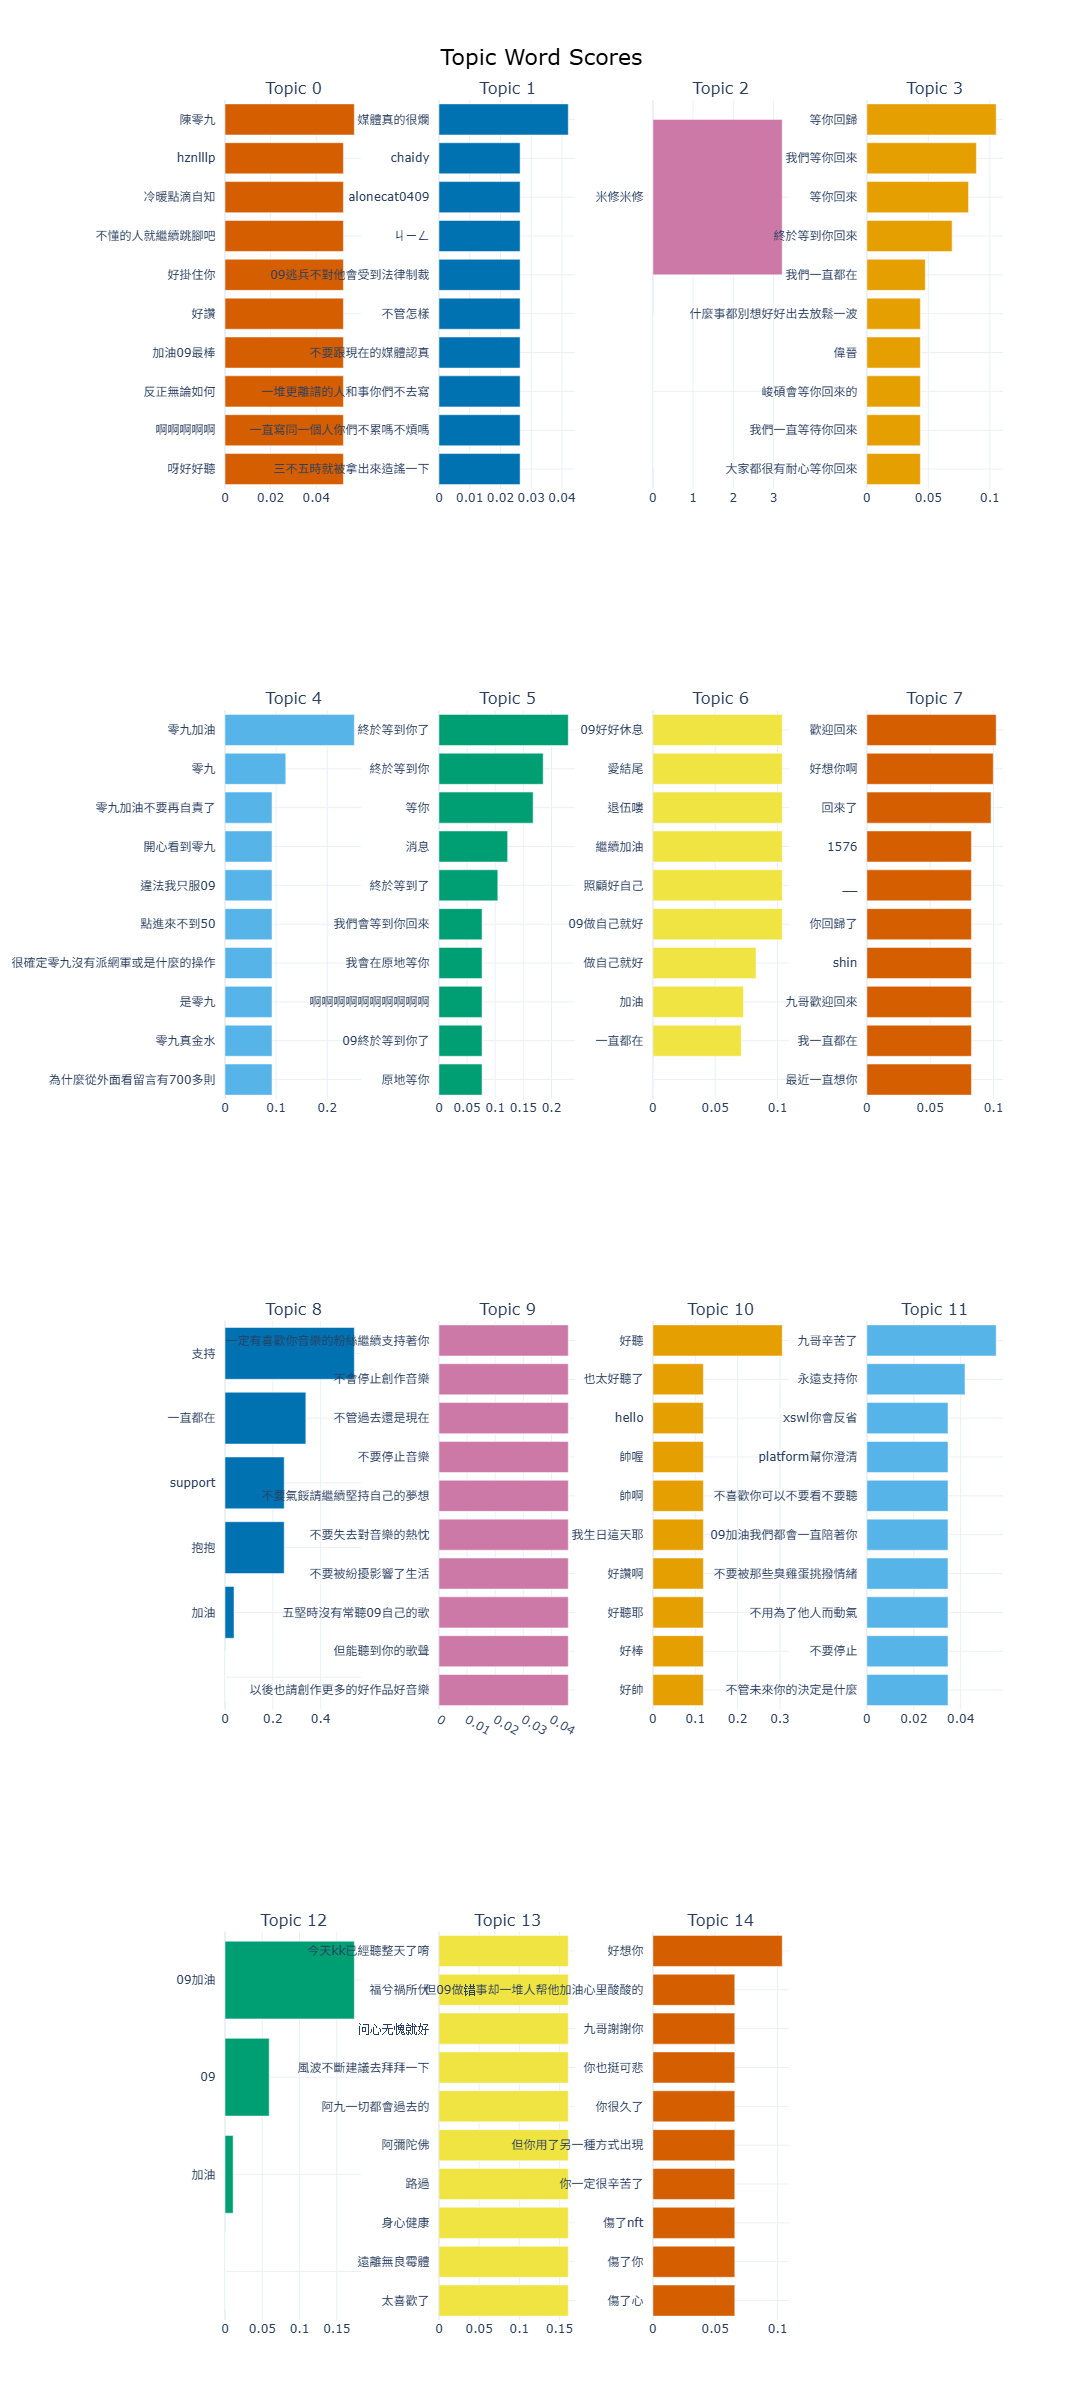

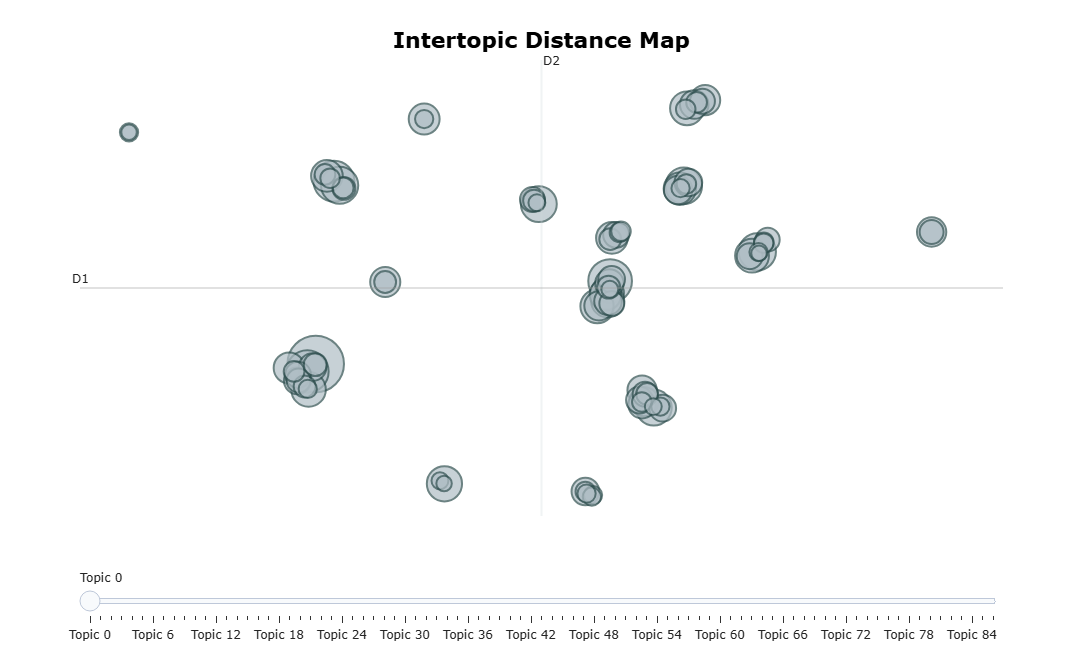

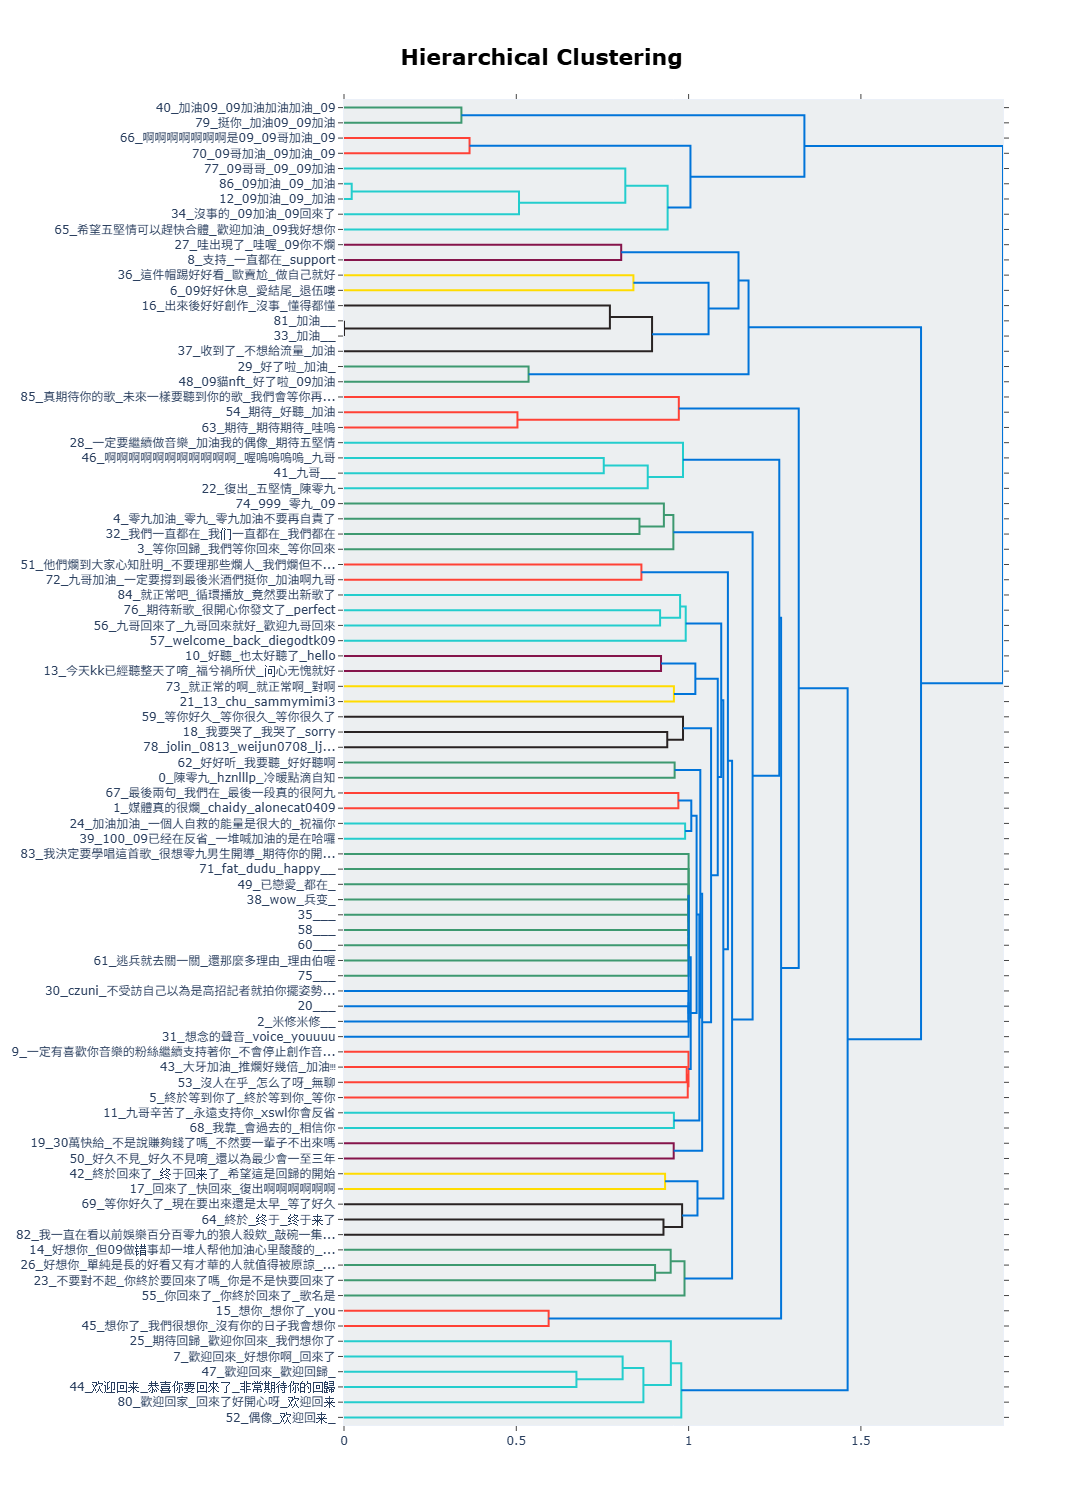

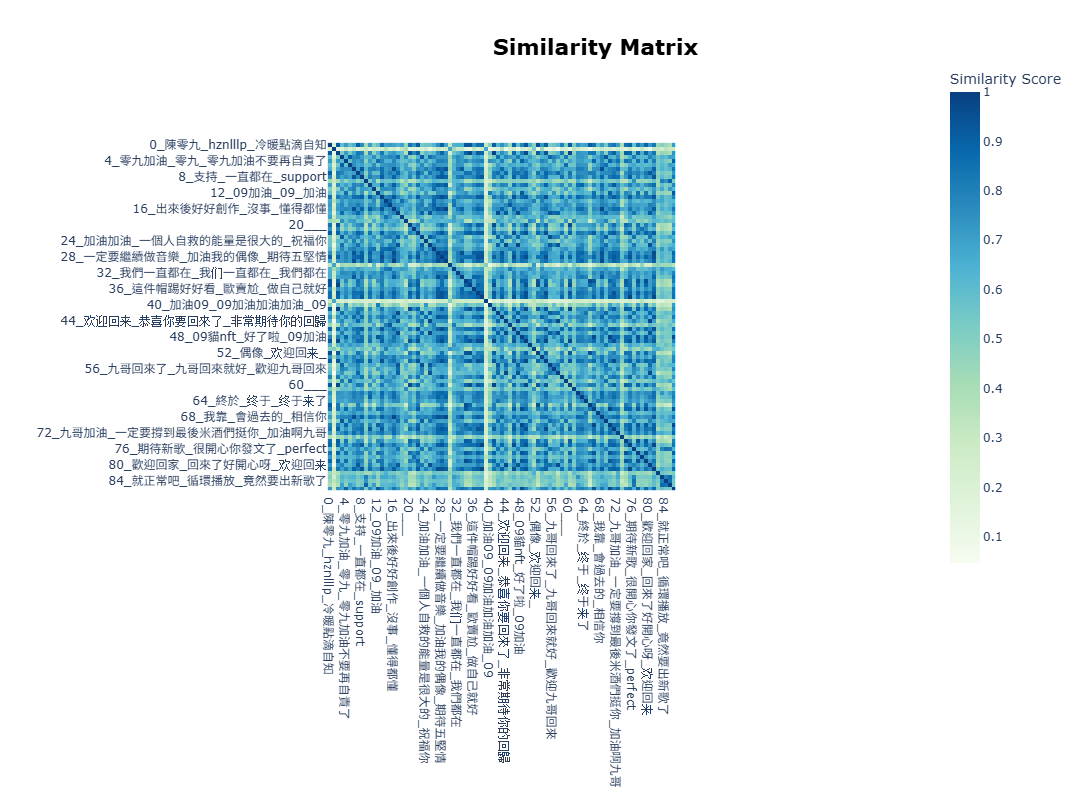


All Done!


In [8]:
for artist in comments_dict:
    # 把留言中的url刪掉
    comments_cleaned = [clean_text(str(c)) for c in comments_dict[artist] if len(clean_text(str(c))) > 2]
    print(f"成功提取出{artist}的留言至comment_cleaned")

    min_size = int(len(comments_cleaned) * 0.0005)
    if min_size < 2:
        min_size = 5

    # min_cluster_size: 一個主題最少要有幾則留言 (可根據資料量調整)
    hdbscan_model = HDBSCAN(min_cluster_size=min_size, metric='euclidean', cluster_selection_method='eom', prediction_data=True)


    #############
    # Training
    #############
    topic_model = BERTopic(
        embedding_model=embedding_model,
        umap_model=umap_model,
        hdbscan_model=hdbscan_model,
        vectorizer_model=vectorizer_model,
        verbose=True
    )
    
    topics, probs = topic_model.fit_transform(comments_cleaned)
    '''
    #########################################################################
    # 如果Topic=-1的文本太多了，執行以下程式，把一些outliers分到最靠近的群體裏面
    #########################################################################
    
    # 將離群值分配給最相似的主題
    new_topics = topic_model.reduce_outliers(comments_cleaned, topics)
    
    # 更新模型中的主題標籤
    topic_model.update_topics(comments_cleaned, topics=new_topics)
    '''
    ###################
    # 結果（文字）　
    ###################
    
    # 取得主題清單 (-1 代表雜訊/不屬於任何主題)
    topic_info = topic_model.get_topic_info()
    print(topic_info.head(10))
    
    # 儲存結果
    folder_path = "hbdscan_topics_result_idividual_csv"

    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    topic_info.to_csv(f"hbdscan_topics_result_idividual_csv/hdbscan_topics_{platform_name}_{artist}.csv", index=False, encoding="utf-8-sig")
    print(f"儲存{artist}的結果到",f"hdbscan_topics_{platform_name}_{artist}.csv")

    ###############
    # 圖形化顯示
    ###############

    if artist == '王大陸資訊分享台灣站':
        continue
    
    folder_path = f"hbdscan_topics_result_idividual_graphs_/{artist}/{platform_name}"

    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # top_n_topics: 顯示前幾個主題
    # n_words: 每個主題顯示幾個關鍵字
    fig1 = topic_model.visualize_barchart(top_n_topics=15, n_words=10, height=600)
    fig1.show()
    
    # 儲存為 HTML 檔（可以用瀏覽器開啟，保留互動功能）
    fig1.write_html(f"hbdscan_topics_result_idividual_graphs_/{artist}/{platform_name}/topic_barchart_{platform_name}_{artist}.html")

    
    # intertopic distance map
    fig2 = topic_model.visualize_topics()
    fig2.show()
    fig2.write_html(f"hbdscan_topics_result_idividual_graphs_/{artist}/{platform_name}/topic_distance_map_{platform_name}_{artist}.html")
    
    # Hierarchy
    fig3 = topic_model.visualize_hierarchy()
    fig3.show()
    fig3.write_html(f"hbdscan_topics_result_idividual_graphs_/{artist}/{platform_name}/topic_hierarchy_{platform_name}_{artist}.html")
    
    # Heat Map
    fig4 = topic_model.visualize_heatmap()
    fig4.show()
    fig4.write_html(f"hbdscan_topics_result_idividual_graphs_/{artist}/{platform_name}/topic_heatmap_{platform_name}_{artist}.html")

print()
print("All Done!")